In [4]:
# !pip install simpy
import numpy as np
import pandas as pd
import pickle as pkl
import simpy
import os
import matplotlib.pyplot as plt
import sys
import simpy
from sim_func import Sim_func
import pymc as pm

## Welcome to the Queue quiz

### You are now incharge of the a queueing system in your work place. Your factory works 24/7 and creates flawless semi-conducter chips.

### Jobs are arriving with a constant rate, on average one every 12 seconds. However, the service times changes with time. We split the week into a 168 grid, where we have 7 days and 24 hours within a single day. For each cell in the grid, that is a combination of a day and an hour we have different service rate. 


## Part 1:

### We first focus on a single service time of a single cell in the grid. Being more specific, Monday from 08:00 to 09:00. 
### In event_log_single_ser below you have pandas dataframe with the eventlog of this specific cell. 

### Your jobs is to understand what is the average service time and its distirbution using Bayesian analysis.

In [2]:
event_log_single_ser = pkl.load(open('../data_queueing_quiz/event_log_single_ser.pkl', 'rb'))
event_log_single_ser.head()

,customer_id,num_cust,event,time_stamp,day,hour
0,0,0,Arrival,30.105252,2,8
1,0,1,Enter_service,30.105252,2,8
2,0,0,Departure,37.798838,2,8
3,1,0,Arrival,38.750399,2,8
4,1,1,Enter_service,38.750399,2,8


## Explanation about the dataframe columns:

### 1. customer_id: the id of customer, each customer has is own id.
### 2. num_cust: the number of customers in the system (including service) prior to the event.
### 3. event: there three type of events: arrival, entering service and departing the system.
### 4. Timestamp: The total time elapased since hour 0 day 1 in seconds.
### 6. day: the day of the week from 1 to 7 where 1 is Sunday.
### 7. hour: the hour of the day 0-23, where 0 is midnight.

## Tasks:

### 1. Do Bayesian anaysis for the average service rate and its distirbution.
### 2. What did you use as the likelihood function and why?
### 3. Do  posterior predicitive anaysis to assert that the chosen likelihood distribution is valid.
### 4. According to the resulted anaysis, how certain are you about the average service prediction?

## Answers and code

## Part 2:

### We next turn to the next part where we wish to map the average service time at each time cell. 

### Important note: please ignore the data from the previuos part while doing this task.

### The data is under df_tot as given below. In the dataset we have missing parts, some cells in the grid are missing. Your job is to fill the grid. 

In [5]:
df_tot = pkl.load(open('../data_queueing_quiz/df_tot.pkl', 'rb'))
df_tot.head(5)

,Unnamed: 0,index,customer_id,num_cust,event,time_stamp,day,hour
0,0,981,327,0,Arrival,3608.653189,1,1
1,1,982,327,1,Enter_service,3608.653189,1,1
2,2,983,327,0,Departure,3609.497913,1,1
3,3,984,328,0,Arrival,3609.790566,1,1
4,4,985,328,1,Enter_service,3609.790566,1,1


## Tasks:

### 1. Extract the mean service times (taking the average time is sufficient, no need  for extra bayesian analysis) per each cell you do have data.
### 2. Use two regression methods for completing the average service time for the rest of the grid.
### 3. Plot on a 3D plot which contains the data, and the surface of the two regression methods.
### 4. What is the probability that the service time of chip, between 16:00 to 18:00, on Shabbat, will be between 6 to 7 seconds? 
### 5. Please give full specification of the Gauusian distribution of the service time on Sunday between 14:00 to 15:00 and Sunday between 16:00 to 17:00. 
### 6. What is the correlation between the service times at Sunday between 14:00 to 15:00 and Sunday between 16:00 to 17:00?
### What is the correlation between the service times at Sunday between 14:00 to 15:00 and Sunday between 20:00 to 21:00?
### Which correlation value is larger? does this result make sense?


## You code here

## Task 3:

### For cross validation of the previuos task we wish to see how accurate our predictions. 

### We use your prediction to estimate the waiting times at each points via simulation. The better the estimation made in you GP regressior the more accurate the simulations results. 

### In this part we compare the average waiting time at each cell with the true average waiting times. The true values are loaded below into 'true_results'. 


In [10]:
true_results = pkl.load(open('../data_queueing_quiz/true_results.pkl', 'rb'))
true_results.shape

(167,)

### In true_results you have a numpy array with 167 values. The first value is the  average number of customers in the system at the end of the hour 0 day 1, the second is hour 1 day 1, and so on. This is an averge of 200 simulation runs. Note that the grid contains 168 values but here we have only 167. This means, we do not test for 23:00-0:00 at the day 7 (from technincal reasons).

### In order to compute your waiting time predictions insert your predicitons into Sim_func below. Then, the line of code below extracts the average waiting time predictions into the variable  'preds_results'.

### At this point you have two vectors of size (167,),  one represents the true average waiting times and the other represent your predicitons. 

### The first value represents the average waiting time at Sunday between 0:00-01:00. The 50th cell represent the average waiting time at Tuesday between 01:00 to 02:00. 

## Tasks

### 1. Compute the average waiting times using the function Sim_func. Compare your results between your predictions and the ground truth using MSE. 

### 2. Plot the average waiting as a function of time of the week. That is, y-axis is the average waiting time and the X-axis is the hour of the week. Following the exmaple from above Tuesday between 01:00 to 02:00 is the 50th hour. 


In [ ]:
## Insert your predictions her

df_  = Sim_func(YOUR_PREDICTION)
## Converting the simulation results into a numpy array from a PD dataframe.
preds_results = np.array(df_.iloc[:,2:]).mean(axis = 1)


In [ ]:
### Your code here

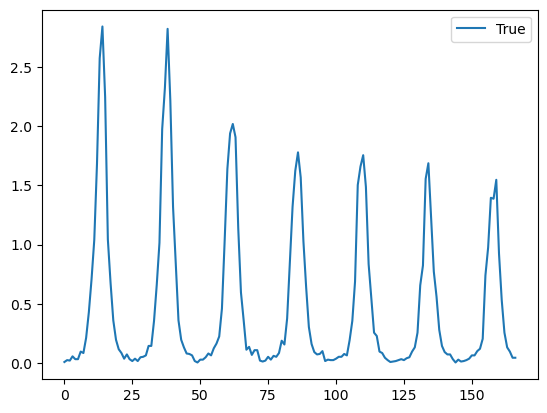

In [9]:
plt.figure()
plt.plot(np.arange(167), true_results, label = 'True')
# plt.plot(np.arange(167), preds_results, label = 'Predicted')

plt.legend()
plt.show()